In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
xmin = -9
xmax = 9
dx = 0.1

ymin = -12
ymax = 12
dy = 0.1

In [23]:
# x_coords and y_coords cell centered
x_coords = np.arange(xmin + dx/2, xmax + dx/2, dx)
y_coords = np.arange(ymax - dy/2, ymin - dy/2, -dy)

In [24]:
xx, yy = np.meshgrid(x_coords, y_coords, indexing='xy')

In [25]:
r = 1.8288

inside_circle = np.square(xx) + np.square(yy) <= np.square(r)

In [26]:
xx

array([[-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       ...,
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95],
       [-8.95, -8.85, -8.75, ...,  8.75,  8.85,  8.95]])

In [27]:
yy

array([[ 11.95,  11.95,  11.95, ...,  11.95,  11.95,  11.95],
       [ 11.85,  11.85,  11.85, ...,  11.85,  11.85,  11.85],
       [ 11.75,  11.75,  11.75, ...,  11.75,  11.75,  11.75],
       ...,
       [-11.75, -11.75, -11.75, ..., -11.75, -11.75, -11.75],
       [-11.85, -11.85, -11.85, ..., -11.85, -11.85, -11.85],
       [-11.95, -11.95, -11.95, ..., -11.95, -11.95, -11.95]])

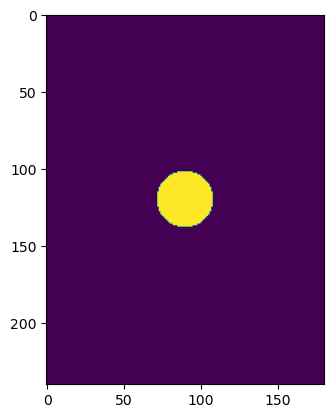

In [28]:
plt.imshow(inside_circle)

In [29]:
control_mass =  0.5

treatment_mass = 1.27

In [30]:
inside_circle.shape

(240, 180)